In [135]:
import sys
sys.path.append("../../src")

In [136]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Load and preprocess data

In [138]:
import data

In [139]:
# set db path hackily
data._get_connection("../../data/participants.db")

raw_df = data.get_trials_df(data.load_raw_results(),
                            ("experiment_id", "materials_id", "item_id", "condition_id"))

response_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & (raw_df.trial_type == "html-slider-response-with-copout")]

Missing datastring for uid A33LYSCQQU1YDJ:31JLPPHS2VIHTNHTYQX3Y0LM83NO3X. Status was 1.
Missing datastring for uid A1VWP7HOSGKATD:37WLF8U1WQEX0FJWJ038YMGXYHE6KK. Status was 1.
Missing datastring for uid A6QDP0HAGE9W5:3V0Z7YWSIZONYPU7V25CAIA2YANV2I. Status was 1.
Missing datastring for uid A19VDBNACNJNI8:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU. Status was 1.
Missing datastring for uid AQ5TMPEPN5UIP:3QUO65DNQVC1SHUCDAT4L9BMNIZUO9. Status was 1.


In [140]:
# Drop dupes.
print(f"Dropping {response_df.index.duplicated().sum()} dupe results.")
response_df = response_df[~response_df.index.duplicated()]

Dropping 35 dupe results.


In [141]:
# Expand condition data
response_df = pd.concat([response_df,
                         response_df.condition_id.apply(pd.Series).rename(columns=lambda k: f"condition_{k}")],
                        axis=1) \
    .drop(columns="condition_id")

In [142]:
# Convert condition_id to independent features
response_df["agent_is_given"] = response_df["condition_0"] == 0
response_df["agent_is_subject"] = response_df["condition_1"] == 1

In [143]:
# Norm slider values within-subject.
response_df["slider_value_normed"] = \
    response_df.groupby("uniqueid").slider_value.apply(lambda xs: (xs - xs.mean()) / xs.std())

In [144]:
# dtype fixes
response_df["slider_copout"] = response_df.slider_copout.astype(bool)
response_df["dateTime"] = pd.to_datetime(response_df.dateTime, unit="ms")

In [145]:
response_df.head()

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,dateTime,experiment_id,...,survey_question_idx,survey_answer,slider_value,slider_copout,condition_0,condition_1,condition_2,agent_is_given,agent_is_subject,slider_value_normed
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
3,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,11532.0,0.0-3.0,2021-08-23 19:33:33.192,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,solid,full,False,False,NaN
4,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,6128.0,0.0-4.0,2021-08-23 19:33:39.325,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,liquid,full,False,False,NaN
5,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,7564.0,0.0-5.0,2021-08-23 19:33:46.893,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,empty,False,False,NaN
6,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,9300.0,0.0-6.0,2021-08-23 19:33:56.197,04_comprehension_swarm-full,...,<NA>,NaN,87.0,False,practice,solid,empty,False,False,0.751921
7,AY47KVC8X22GG:3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,0,0,3S0TNUHWKU6CQNWAKYEJENHYL5SD8Q,AY47KVC8X22GG,3QO7EE372OBMUA0T2UZBH4I8HWNQBN,html-slider-response-with-copout,4540.0,0.0-7.0,2021-08-23 19:34:00.742,04_comprehension_swarm-full,...,<NA>,NaN,NaN,True,practice,abstract,full,False,False,NaN


In [146]:
response_df.to_csv("raw_responses.csv")

## Preliminaries

In [147]:
len(response_df.reset_index().uniqueid.unique())

66

### Demo

In [148]:
# again hack -- forgot to put in experiment_id
qualitative_df = raw_df[(raw_df.experiment_id == "04_comprehension_swarm-full") & raw_df.trial_type.isin(("survey-text", "survey-multi-choice"))]

<AxesSubplot:xlabel='survey_answer', ylabel='Count'>

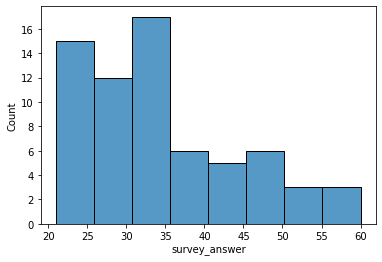

In [149]:
ages = qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id == "0.0-0.0")].survey_answer.astype(int)
sns.histplot(ages)

In [150]:
education = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 0)].survey_answer
education.value_counts()

Bachelor's degree    39
Master's degree      18
Some college          9
High school/GED       1
Name: survey_answer, dtype: int64

In [151]:
native = qualitative_df[(qualitative_df.trial_type == "survey-multi-choice") & (qualitative_df.survey_question_idx == 1)].survey_answer
native.value_counts()

Yes    66
No      1
Name: survey_answer, dtype: int64

### Comments

In [152]:
list(qualitative_df[(qualitative_df.trial_type == "survey-text") & (qualitative_df.internal_node_id != "0.0-0.0")].survey_answer)

['nice',
 'None',
 '',
 'GOOD',
 '',
 '',
 '',
 '',
 '',
 'very goods',
 'very interesting',
 'nice',
 'No',
 'good job',
 'No.',
 'very well',
 '',
 '',
 'NICE',
 'Good and easy task',
 'It was a good survey.',
 'good',
 'This was a fascinating and enjoyable study.',
 'This survey is good and usefull me',
 '',
 'very like the survey',
 'none',
 'GOOD',
 'Interested',
 'This survey is very nice and very good ',
 'Good task and good study.',
 '',
 'very interesting',
 'none',
 'nothing',
 '',
 'cool hit!',
 'nothing',
 'good',
 'nice.',
 'LIKE IT',
 'good study',
 'very nice study',
 'none',
 'none',
 '',
 'none',
 '',
 'na',
 'good',
 'LIKE IT',
 '',
 'very interesting',
 'Good experiment',
 '',
 '',
 'It was good',
 '',
 '',
 'Enjoyed the survey.',
 '',
 '',
 '',
 'noe',
 '',
 'nice survey',
 'none']

### Total times

Text(0.5, 1.0, 'Total study time (minutes)')

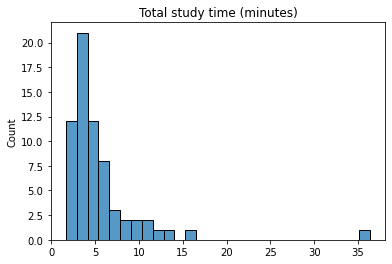

In [153]:
sns.histplot(pd.concat([response_df, qualitative_df]).groupby("uniqueid").apply(lambda rows: rows.rt.sum() / 1000 / 60))
plt.title("Total study time (minutes)")

In [154]:
pd.concat([response_df, qualitative_df]).groupby("uniqueid").rt.sum().apply(lambda xs: xs / 1000 / 60).agg(["mean", "std"])

mean    5.544586
std     4.808690
Name: rt, dtype: float64

### Response times

In [155]:
# sns.displot(data=response_df, x="rt", hue="uniqueid", kind="hist")

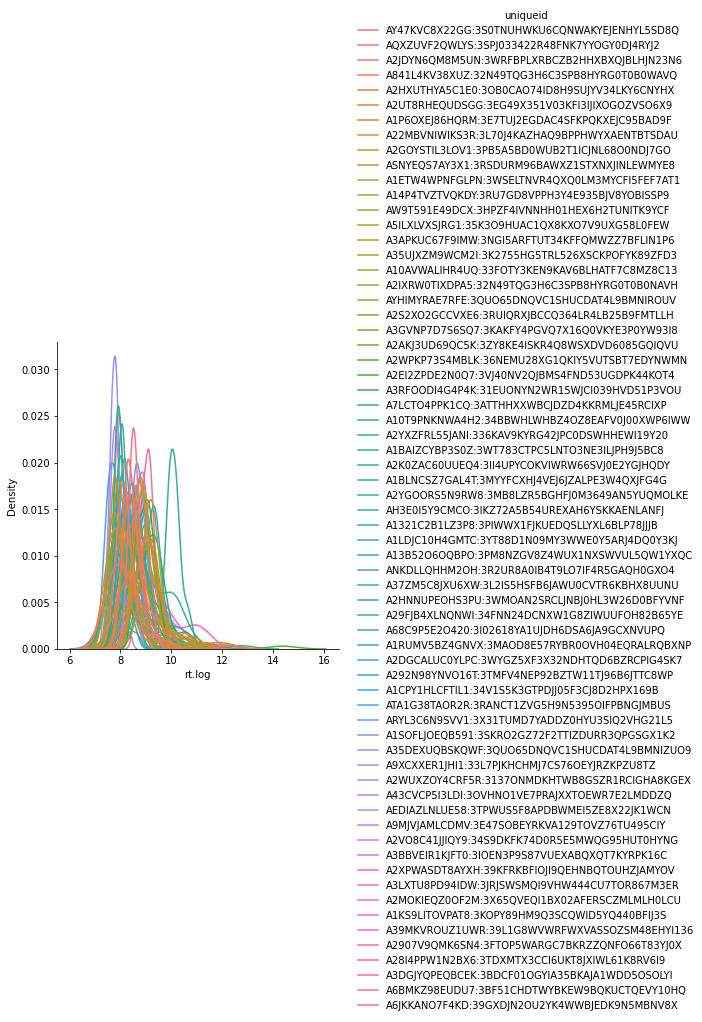

In [156]:
response_df["rt.log"] = np.log(response_df.rt)
sns.displot(data=response_df, x="rt.log", hue="uniqueid", kind="kde")

Text(0.5, 1.0, 'Log response time vs. trial position')

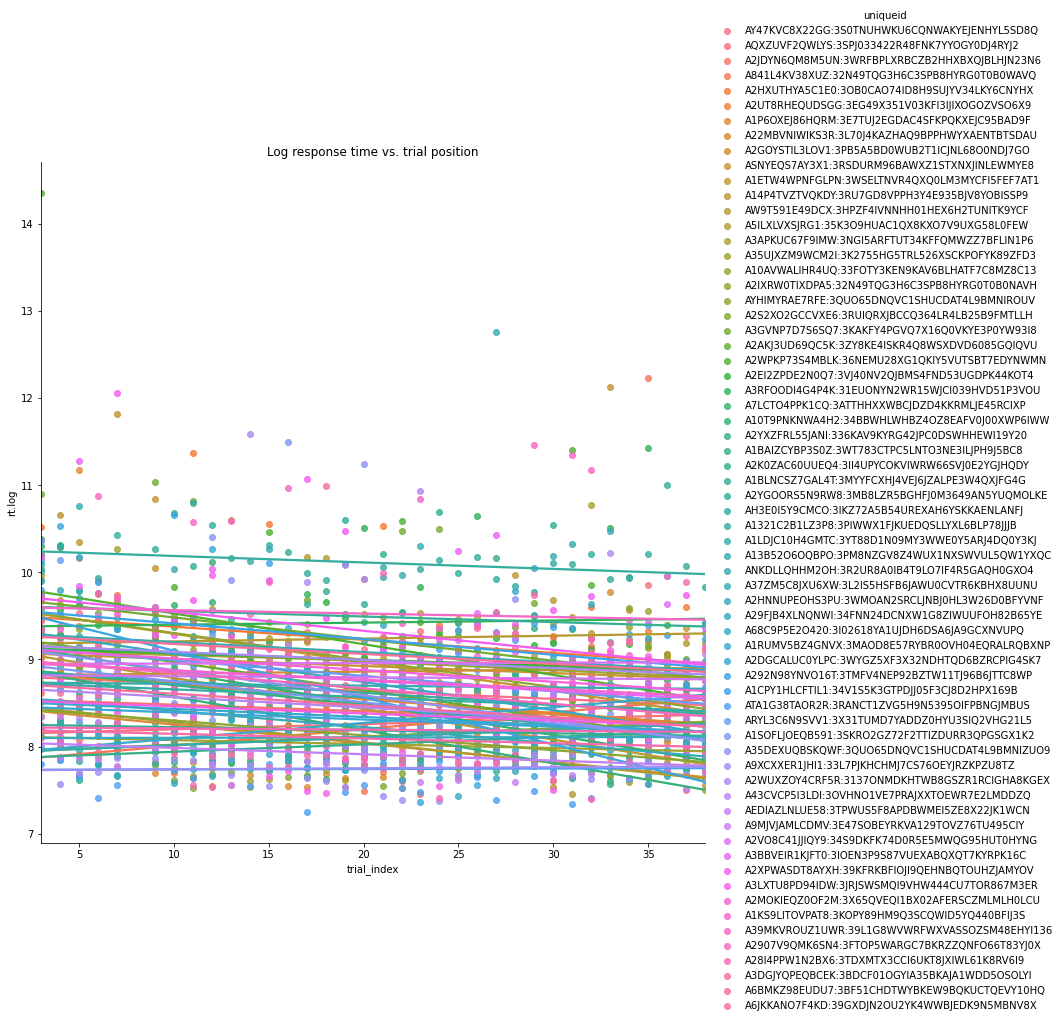

In [157]:
sns.lmplot(data=response_df.reset_index(), x="trial_index", y="rt.log", hue="uniqueid", height=10, ci=False)
plt.title("Log response time vs. trial position")

### How are people using the sliders?

- Stripplot points correspond to individual slider responses.
- Responses are grouped vertically by subject.
- Transparent boxplots indicate filler response value for a particular subject. Red median lines / boxes indicate "full" fillers and blue indicate "empty."
- X marks indicate mean practice response value for a particular subject. Red and blue match above.

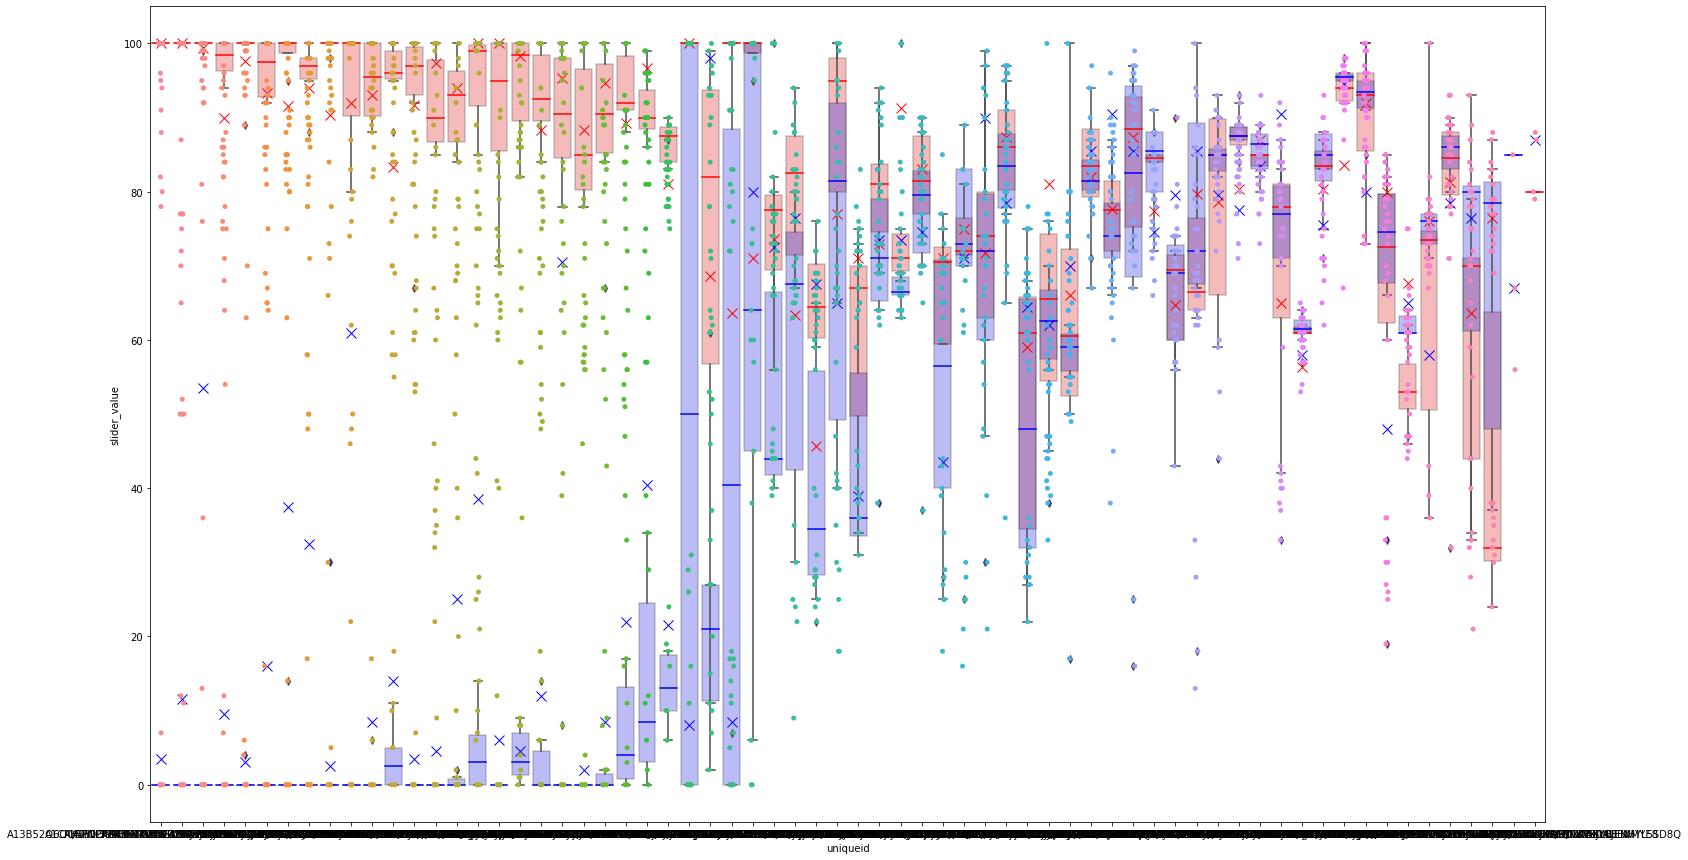

In [158]:
# Order S by descending difference between mean full-filler and empty-filler rating
filler_rows = response_df[response_df.condition_0 == "filler"]
filler_diffs = filler_rows.groupby("uniqueid").apply(lambda xs: xs[xs.condition_1 == "full"].slider_value.mean() - xs[xs.condition_1 == "empty"].slider_value.mean())
subject_order = filler_diffs.sort_values(ascending=False).index

plt.subplots(figsize=(25, 15))
g = sns.stripplot(data=response_df.reset_index(), x="uniqueid", y="slider_value", order=subject_order)

# plot filler responses
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "full")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order,
            color="red", medianprops=dict(color="red"), flierprops=dict(markerfacecolor="red"), boxprops=dict(alpha=0.3))
sns.boxplot(data=response_df[(response_df.condition_0 == "filler") & (response_df.condition_1 == "empty")].reset_index(),
            x="uniqueid", y="slider_value", order=subject_order, 
            color="blue", medianprops=dict(color="blue"), flierprops=dict(markerfacecolor="blue"), boxprops=dict(alpha=0.3))

# plot practice responses
practice_full, practice_empty = [], []
for i, subj in enumerate(subject_order):
    subj_rows = response_df.xs(subj, level="uniqueid")
    subj_rows = subj_rows[(subj_rows.condition_0 == "practice")]
    practice_full.append(subj_rows[subj_rows.condition_2 == "full"].slider_value.mean())
    practice_empty.append(subj_rows[subj_rows.condition_2 == "empty"].slider_value.mean())
    
g.plot(np.arange(len(subject_order)), practice_full, marker="x", markersize=10, color="red", linestyle="none")
g.plot(np.arange(len(subject_order)), practice_empty, marker="x", markersize=10, color="blue", linestyle="none")

## Attention checks

### Practice round

/opt/conda/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<AxesSubplot:xlabel='t'>

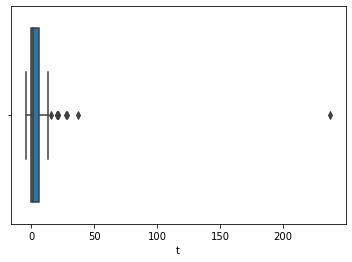

In [159]:
from scipy.stats import ttest_ind
def compute_practice_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" practice items
    """
    practice_rows = subj_rows[subj_rows.condition_0 == "practice"]
    
    # Filter out copouts (and print warning -- practice should not trigger copout)
    copout_rows = practice_rows[practice_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {practice_rows.iloc[0].name} had {len(copout_rows)} practice copout(s). Seems fishy.")
    practice_rows = practice_rows[~practice_rows.slider_copout]
    
    full_practice = practice_rows[practice_rows.condition_2 == "full"]
    empty_practice = practice_rows[practice_rows.condition_2 == "empty"]
    
    return pd.Series(ttest_ind(full_practice.slider_value, empty_practice.slider_value),
                     index=["t", "pval"])

practice_stats = response_df.groupby("uniqueid").apply(compute_practice_ttest)
sns.boxplot(data=practice_stats.reset_index(), x="t", hue="uniqueid")

In [160]:
practice_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
AQXZUVF2QWLYS:3SPJ033422R48FNK7YYOGY0DJ4RYJ2,-4.098004,0.026284
A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF,-1.544744,0.220114
A6BMKZ98EUDU7:3BF51CHDTWYBKEW9BQKUCTQEVY10HQ,-1.403096,0.255176
A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9,-1.390622,0.258543
A9XCXXER1JHI1:33L7PJKHCHMJ7CS76OEYJRZKPZU8TZ,-1.070259,0.362958
A2MOKIEQZ0OF2M:3X65QVEQI1BX02AFERSCZMLMLH0LCU,-1.006372,0.388376
A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU,-1.003163,0.389696
A3GVNP7D7S6SQ7:3KAKFY4PGVQ7X16Q0VKYE3P0YW93I8,-0.928548,0.421615
A2DGCALUC0YLPC:3WYGZ5XF3X32NDHTQD6BZRCPIG4SK7,-0.906217,0.431626


#### Practice failures by item

In [161]:
practice_df = response_df[response_df.condition_0 == "practice"]
practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)

<ipython-input-161-380d923c644c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["match"] = practice_df.apply(lambda r: r.slider_value > 50 if r.condition_2 == "full" else r.slider_value <= 50, axis=1)
<ipython-input-161-380d923c644c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  practice_df["practice_id"] = practice_df.condition_1.str.cat(practice_df.condition_2)


In [162]:
practice_df.groupby("practice_id").match.mean()

practice_id
abstractempty    0.454545
abstractfull     0.803030
liquidfull       0.924242
solidempty       0.348485
solidfull        0.924242
Name: match, dtype: float64

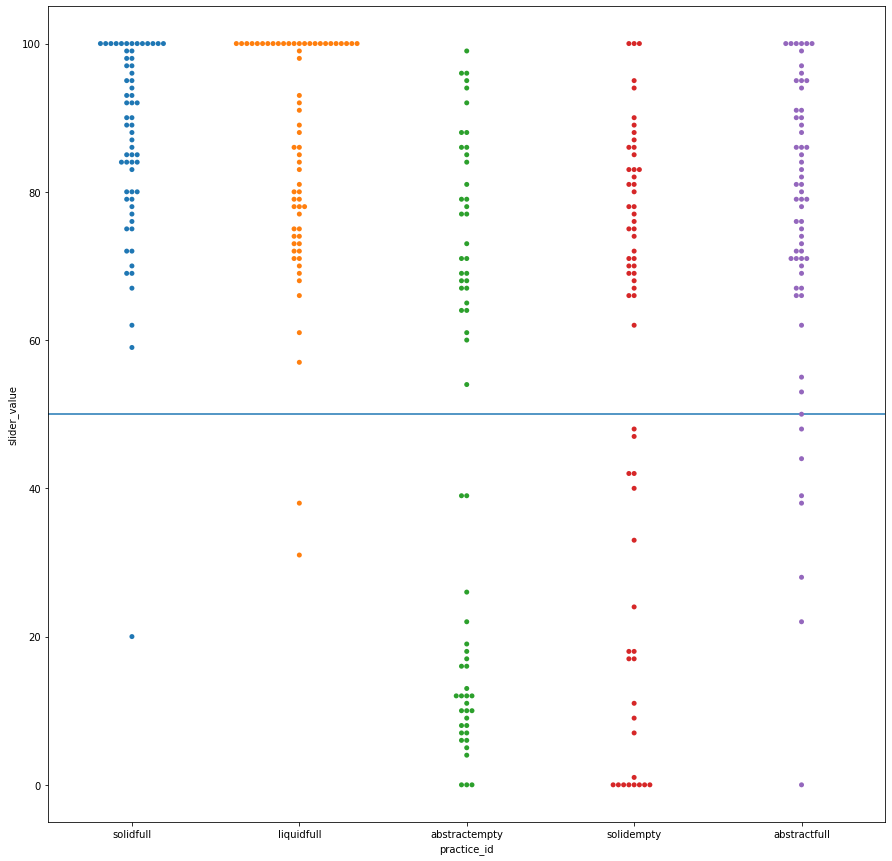

In [163]:
plt.subplots(figsize=(15,15))
sns.swarmplot(data=practice_df.reset_index(), x="practice_id", y="slider_value")
plt.axhline(50)

#### Practice copouts

In [164]:
response_df[response_df.condition_0 == "practice"].groupby(["condition_1", "condition_2"]).slider_copout.agg(["mean", "count"]).sort_values("mean", ascending=False)

mean  count
condition_1 condition_2                 
abstract    full         0.075758     66
solid       empty        0.075758     66
            full         0.060606     66
abstract    empty        0.045455     66
liquid      full         0.045455     66

### Fillers

<AxesSubplot:xlabel='t'>

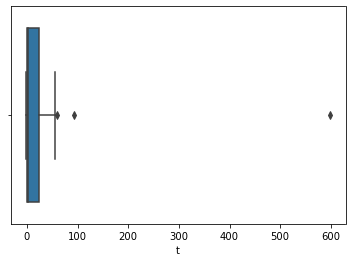

In [165]:
from scipy.stats import ttest_ind
def compute_filler_ttest(subj_rows):
    """
    sanity check: "full" items should be rated higher than "empty" filler items
    """
    filler_rows = subj_rows[subj_rows.condition_0 == "filler"]
    
    # Filter out copouts (and print warning -- fillers should not trigger copout)
    copout_rows = filler_rows[filler_rows.slider_copout]
    if len(copout_rows) > 0:
        print(f"WARNING: subject {filler_rows.iloc[0].name} had {len(copout_rows)} filler copout(s). Seems fishy.")
    filler_rows = filler_rows[~filler_rows.slider_copout]
    
    full_filler = filler_rows[filler_rows.condition_1 == "full"]
    empty_filler = filler_rows[filler_rows.condition_1 == "empty"]
    
    return pd.Series(ttest_ind(full_filler.slider_value, empty_filler.slider_value),
                     index=["t", "pval"])

filler_stats = response_df.groupby("uniqueid").apply(compute_filler_ttest)
sns.boxplot(data=filler_stats.reset_index(), x="t", hue="uniqueid")

In [166]:
filler_stats.sort_values("t").head(50)

,t,pval
uniqueid,,
A2MOKIEQZ0OF2M:3X65QVEQI1BX02AFERSCZMLMLH0LCU,-2.015044,7.156987e-02
A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW,-1.720933,1.159980e-01
A5ILXLVXSJRG1:35K3O9HUAC1QX8KXO7V9UXG58L0FEW,-1.381426,1.972313e-01
A37ZM5C8JXU6XW:3L2IS5HSFB6JAWU0CVTR6KBHX8UUNU,-1.005735,3.382585e-01
A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU,-0.876703,4.034415e-01
A28I4PPW1N2BX6:3TDXMTX3CCI6UKT8JXIWL61K8RV6I9,-0.752071,4.693401e-01
A2K0ZAC60UUEQ4:3II4UPYCOKVIWRW66SVJ0E2YGJHQDY,-0.745421,4.750336e-01
AYHIMYRAE7RFE:3QUO65DNQVC1SHUCDAT4L9BMNIROUV,-0.694988,5.028914e-01
A35UJXZM9WCM2I:3K2755HG5TRL526XSCKPOFYK89ZFD3,-0.422577,6.815463e-01


#### Filler copouts

In [167]:
response_df[response_df.condition_0 == "filler"].groupby(["item_id", "condition_1"]).slider_copout.agg(["mean", "sum", "count"]).sort_values("mean", ascending=False)

,,mean,sum,count
item_id,condition_1,,,
3.0,empty,0.075758,5,66
5.0,empty,0.060606,4,66
6.0,full,0.060606,4,66
8.0,full,0.060606,4,66
10.0,full,0.060606,4,66
11.0,full,0.060606,4,66
0.0,empty,0.045455,3,66
1.0,empty,0.045455,3,66
4.0,empty,0.045455,3,66


#### Filler failures by item

In [168]:
filler_df = response_df[response_df.condition_0 == "filler"]
filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)

<ipython-input-168-5f9f2f07b75b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filler_df["match"] = filler_df.apply(lambda r: r.slider_value > 50 if r.condition_1 == "full" else r.slider_value <= 50, axis=1)


In [169]:
filler_df.groupby(["condition_1", "item_id"]).match.mean()

condition_1  item_id
empty        0.0        0.530303
             1.0        0.500000
             2.0        0.439394
             3.0        0.484848
             4.0        0.484848
             5.0        0.515152
full         6.0        0.863636
             7.0        0.863636
             8.0        0.878788
             9.0        0.909091
             10.0       0.863636
             11.0       0.878788
Name: match, dtype: float64

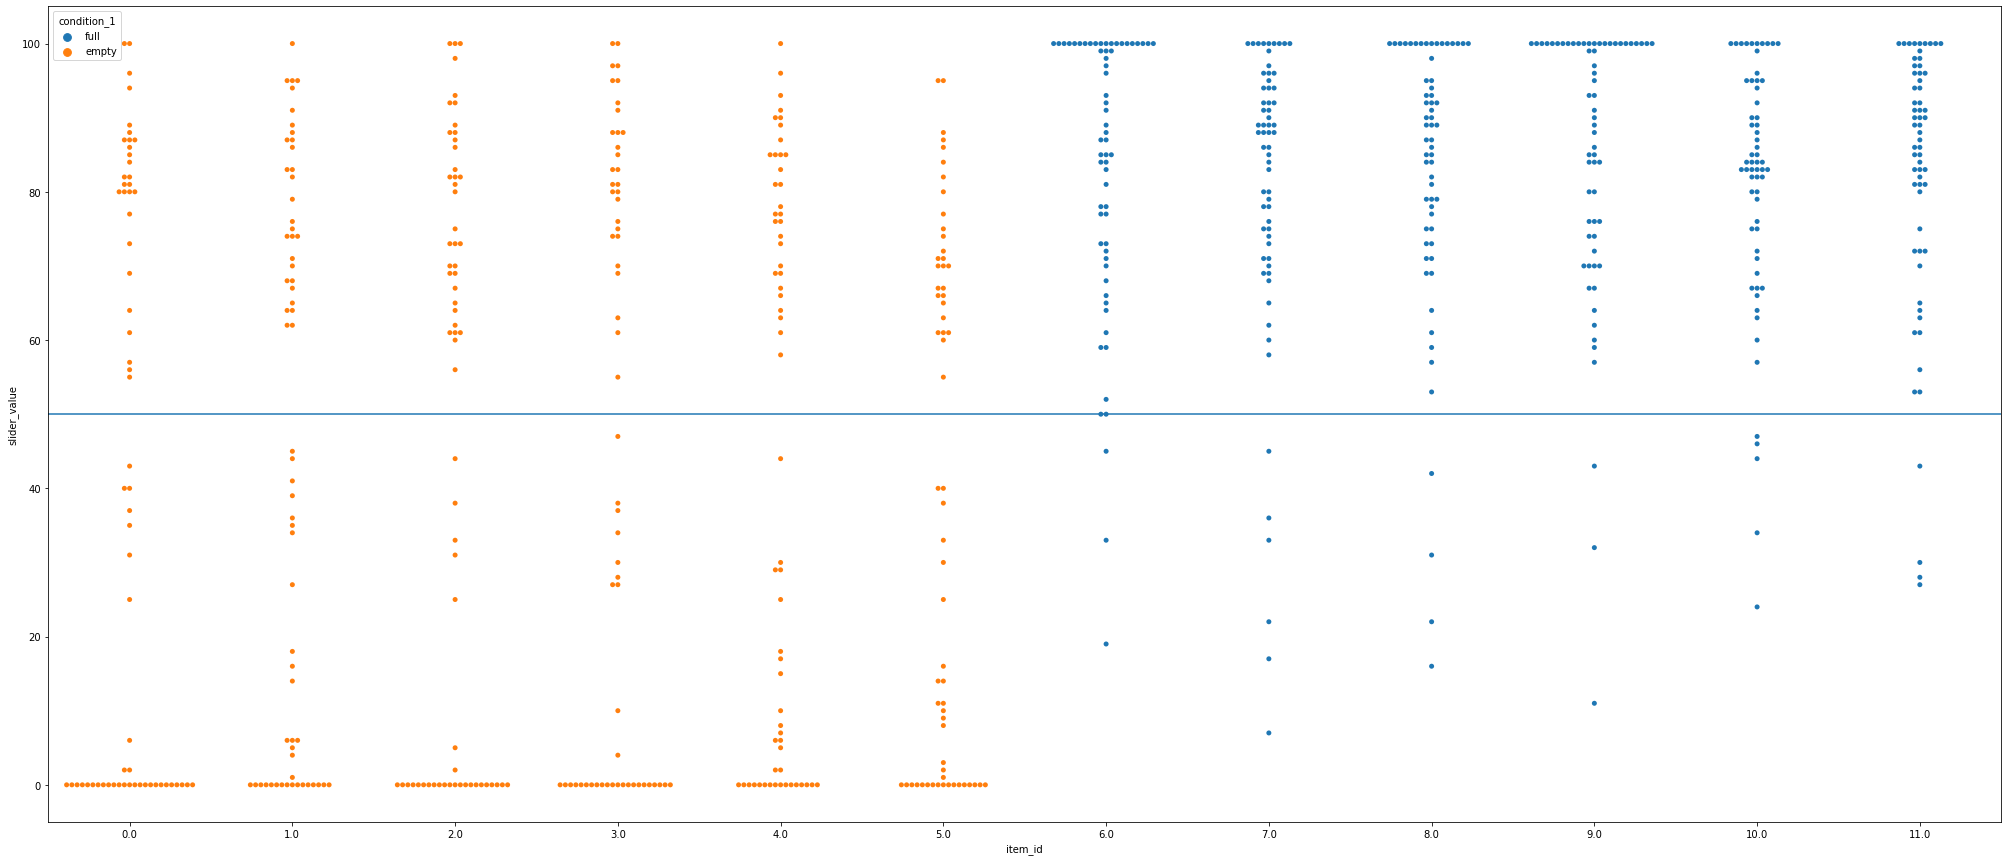

In [170]:
plt.subplots(figsize=(35,15))
# sns.barplot(data=filler_df.reset_index(), x="condition_1", hue="item_id", y="slider_value")
sns.swarmplot(data=filler_df.reset_index(), hue="condition_1", x="item_id", y="slider_value")
plt.axhline(50)

## Final data processing

In [171]:
exp_items = response_df[~(response_df.condition_0.isin(("practice", "filler")))]

### Filter based on practice and attention checks

In [172]:
practice_drops = practice_stats[(practice_stats.t < 0) | (practice_stats.pval > 1e-1) | practice_stats.t.isna()]
drop_pct = np.round(len(practice_drops) / len(practice_stats.index) * 100, 1)
print(f"{len(practice_drops)} subjects ({drop_pct}%) disqualified and dropped due to failed practice.")
print("\t" + "\n\t".join(practice_drops.index))
# exp_items = exp_items.drop(practice_drops.index, level="uniqueid")

attention_drops = filler_stats[(filler_stats.t < 0) | (filler_stats.pval > 1e-1) | filler_stats.t.isna()]
drop_pct = np.round(len(attention_drops) / len(filler_stats.index) * 100, 1)
print(f"{len(attention_drops)} subjects ({drop_pct}%, possibly overlapping with previous) disqualified and dropped due to failed attention checks.")
print("\t" + "\n\t".join(attention_drops.index))
exp_items = exp_items.drop(attention_drops.index, level="uniqueid")

44 subjects (66.7%) disqualified and dropped due to failed practice.
	A10T9PNKNWA4H2:34BBWHLWHBZ4OZ8EAFV0J00XWP6IWW
	A1321C2B1LZ3P8:3PIWWX1FJKUEDQSLLYXL6BLP78JJJB
	A14P4TVZTVQKDY:3RU7GD8VPPH3Y4E935BJV8YOBISSP9
	A1BAIZCYBP3S0Z:3WT783CTPC5LNTO3NE3ILJPH9J5BC8
	A1ETW4WPNFGLPN:3WSELTNVR4QXQ0LM3MYCFI5FEF7AT1
	A1KS9LITOVPAT8:3KOPY89HM9Q3SCQWID5YQ440BFIJ3S
	A1LDJC10H4GMTC:3YT88D1N09MY3WWE0Y5ARJ4DQ0Y3KJ
	A1RUMV5BZ4GNVX:3MAOD8E57RYBR0OVH04EQRALRQBXNP
	A22MBVNIWIKS3R:3L70J4KAZHAQ9BPPHWYXAENTBTSDAU
	A28I4PPW1N2BX6:3TDXMTX3CCI6UKT8JXIWL61K8RV6I9
	A292N98YNVO16T:3TMFV4NEP92BZTW11TJ96B6JTTC8WP
	A29FJB4XLNQNWI:34FNN24DCNXW1G8ZIWUUFOH82B65YE
	A2AKJ3UD69QC5K:3ZY8KE4ISKR4Q8WSXDVD6085GQIQVU
	A2DGCALUC0YLPC:3WYGZ5XF3X32NDHTQD6BZRCPIG4SK7
	A2EI2ZPDE2N0Q7:3VJ40NV2QJBMS4FND53UGDPK44KOT4
	A2HNNUPEOHS3PU:3WMOAN2SRCLJNBJ0HL3W26D0BFYVNF
	A2IXRW0TIXDPA5:32N49TQG3H6C3SPB8HYRG0T0B0NAVH
	A2K0ZAC60UUEQ4:3II4UPYCOKVIWRW66SVJ0E2YGJHQDY
	A2MOKIEQZ0OF2M:3X65QVEQI1BX02AFERSCZMLMLH0LCU
	A2S2XO2GCCVXE6:3RUIQRXJBCCQ364LR4LB25

In [173]:
print(f"{len(set(exp_items.index.get_level_values('uniqueid')))} subjects remaining.")

29 subjects remaining.


### Merge in materials

In [174]:
import json
def load_materials(mat):
    with open(f"../../materials/{mat}.json") as f:
        materials = json.load(f)
    return pd.DataFrame.from_records(materials["items"]).rename(columns={"id": "item_id"}).set_index("item_id")

materials_ids = sorted(set(exp_items.materials_id))
materials_df = pd.concat([load_materials(mat) for mat in materials_ids], names=["materials_id"], keys=materials_ids, axis=0)

materials_df["AV"] = materials_df.A.str.cat(materials_df.V, " ")

# NB this doesn't handle fillers correctly

In [175]:
keep_cols = ["A", "V", "L", "AV", "A concrete?", "A countable?"]
merged_df = pd.merge(exp_items, materials_df[keep_cols], left_on=["materials_id", "item_id"], right_index=True)

### Filter out items which were dropped in later materials iterations

In [176]:
# Partition results into those evaluated on latest materials vs. earlier
latest_materials = materials_ids[-1]
latest_merged_df = merged_df[merged_df.materials_id == latest_materials]
earlier_merged_df = merged_df[merged_df.materials_id != latest_materials]

# Get item IDs which appear only in earlier
early_only = set(earlier_merged_df.item_id) - set(latest_merged_df.item_id)

print(f"Dropping {len(early_only)} item results because they weren't included in the latest materials, {materials_ids[-1]}.")
merged_df = merged_df[~merged_df.item_id.isin(early_only)]

Dropping 0 item results because they weren't included in the latest materials, swarm-004-given.


### Export

In [177]:
merged_df.to_csv("merged_df.csv")

## Basic visualization: construction meaning

In [178]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "A concrete?", "A countable?"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

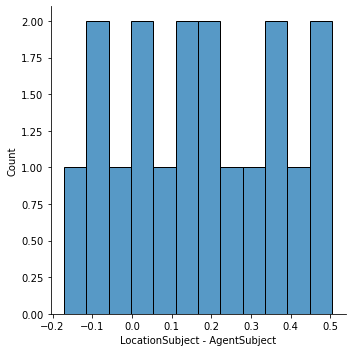

In [179]:
sns.displot(item_differences, bins=12)

In [180]:
item_differences.sort_values(ascending=False)

item_id  A             V        L           A concrete?  A countable?
18.0     birds         flutter  courtyard   True         True            0.504309
64.0     worms         wriggl   bucket      True         True            0.498820
24.0     frogs         hopp     swamp       True         True            0.422496
56.0     tadpoles      swimm    pond        True         True            0.374439
20.0     fireflies     glimmer  backyard    True         True            0.355122
30.0     fear          prickl   fingertips  False        False           0.307395
19.0     bubbles       foam     tub         True         True            0.262262
8.0      cockroaches   creep    cave        True         True            0.210067
17.0     debris        flow     river       True         False           0.175732
31.0     excitement    puls     temples     False        False           0.131246
6.0      terror        cours    body        False        False           0.116713
39.0     sewage        runn 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'cockroaches creep'),
  Text(1, 0, 'sewage runn'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'fireflies glimmer'),
  Text(4, 0, 'birds flutter'),
  Text(5, 0, 'worms wriggl'),
  Text(6, 0, 'lights glow'),
  Text(7, 0, 'terror cours'),
  Text(8, 0, 'bubbles foam'),
  Text(9, 0, 'excitement puls'),
  Text(10, 0, 'tadpoles swimm'),
  Text(11, 0, 'debris flow'),
  Text(12, 0, 'excitement crackl'),
  Text(13, 0, 'trepidation shak'),
  Text(14, 0, 'people bustl'),
  Text(15, 0, 'fear prickl'),
  Text(16, 0, 'anticipation tingl'),
  Text(17, 0, 'energy humm')])

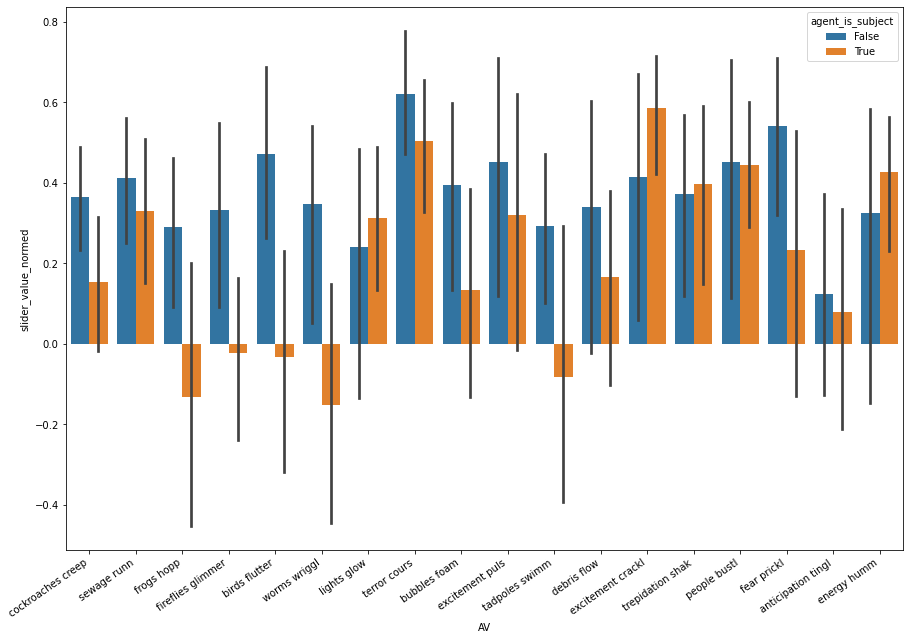

In [181]:
plt.subplots(figsize=(15, 10))
sns.barplot(data=merged_df.reset_index(), x="AV", hue="agent_is_subject", y="slider_value_normed")
plt.xticks(rotation=35, ha="right")

<AxesSubplot:xlabel='A concrete?', ylabel='LocationSubject - AgentSubject'>

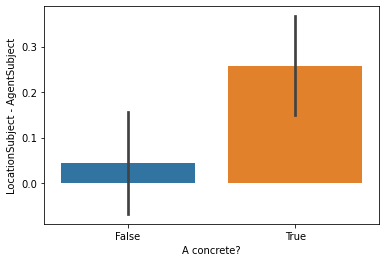

In [182]:
sns.barplot(data=item_differences.reset_index(), x="A concrete?", y="LocationSubject - AgentSubject")

<AxesSubplot:xlabel='A countable?', ylabel='LocationSubject - AgentSubject'>

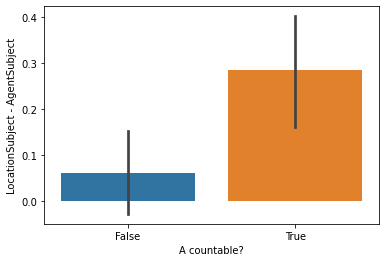

In [183]:
sns.barplot(data=item_differences.reset_index(), x="A countable?", y="LocationSubject - AgentSubject")

#### Bootstrap check

In [184]:
def eval_bootstrap(rows):
    pos = [value for cond, value in rows if cond]
    neg = [value for cond, value in rows if not cond]
    if not pos or not neg:
        return None
    return np.mean(neg) - np.mean(pos)

def item_bootstrap(rows):
    rows = rows[~rows.slider_copout]
    bootstrap = sns.algorithms.bootstrap(rows[["agent_is_subject", "slider_value_normed"]],
                                         n_boot=10000, func=eval_bootstrap)
    # Drop samples where there were no positive or negative classes
    bootstrap = [x for x in bootstrap if x is not None]
    
    pcts = np.percentile(bootstrap, [0.025, 0.975])
    return pd.Series({"low": pcts[0], "high": pcts[1]})

item_bootstrap_df = merged_df.groupby("item_id").apply(item_bootstrap)
item_bootstrap_df

,low,high
item_id,,
4.0,-0.812138,-0.473162
6.0,-0.257953,-0.144777
7.0,-0.956812,-0.655610
8.0,-0.173225,-0.055259
17.0,-0.679761,-0.352293
18.0,-0.018533,0.117821
19.0,-0.386221,-0.166695
20.0,-0.260535,-0.056012
22.0,-0.918946,-0.571634


In [185]:
item_bootstrap_df = \
    pd.merge(item_bootstrap_df, materials_df.loc[latest_materials][["A", "V", "AV", "L"]],
             left_index=True, right_index=True).sort_values("low", ascending=False)

In [186]:
item_bootstrap_df.sort_values("low", ascending=False)

,low,high,A,V,AV,L
item_id,,,,,,
18,-0.018533,0.117821,birds,flutter,birds flutter,courtyard
8,-0.173225,-0.055259,cockroaches,creep,cockroaches creep,cave
24,-0.206181,-0.045050,frogs,hopp,frogs hopp,swamp
64,-0.222107,0.001096,worms,wriggl,worms wriggl,bucket
6,-0.257953,-0.144777,terror,cours,terror cours,body
20,-0.260535,-0.056012,fireflies,glimmer,fireflies glimmer,backyard
39,-0.345177,-0.205570,sewage,runn,sewage runn,street
56,-0.368770,-0.110754,tadpoles,swimm,tadpoles swimm,pond
30,-0.374137,-0.137982,fear,prickl,fear prickl,fingertips


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'birds flutter'),
  Text(1, 0, 'cockroaches creep'),
  Text(2, 0, 'frogs hopp'),
  Text(3, 0, 'worms wriggl'),
  Text(4, 0, 'terror cours'),
  Text(5, 0, 'fireflies glimmer'),
  Text(6, 0, 'sewage runn'),
  Text(7, 0, 'tadpoles swimm'),
  Text(8, 0, 'fear prickl'),
  Text(9, 0, 'bubbles foam'),
  Text(10, 0, 'trepidation shak'),
  Text(11, 0, 'anticipation tingl'),
  Text(12, 0, 'debris flow'),
  Text(13, 0, 'excitement puls'),
  Text(14, 0, 'people bustl'),
  Text(15, 0, 'lights glow'),
  Text(16, 0, 'excitement crackl'),
  Text(17, 0, 'energy humm')])

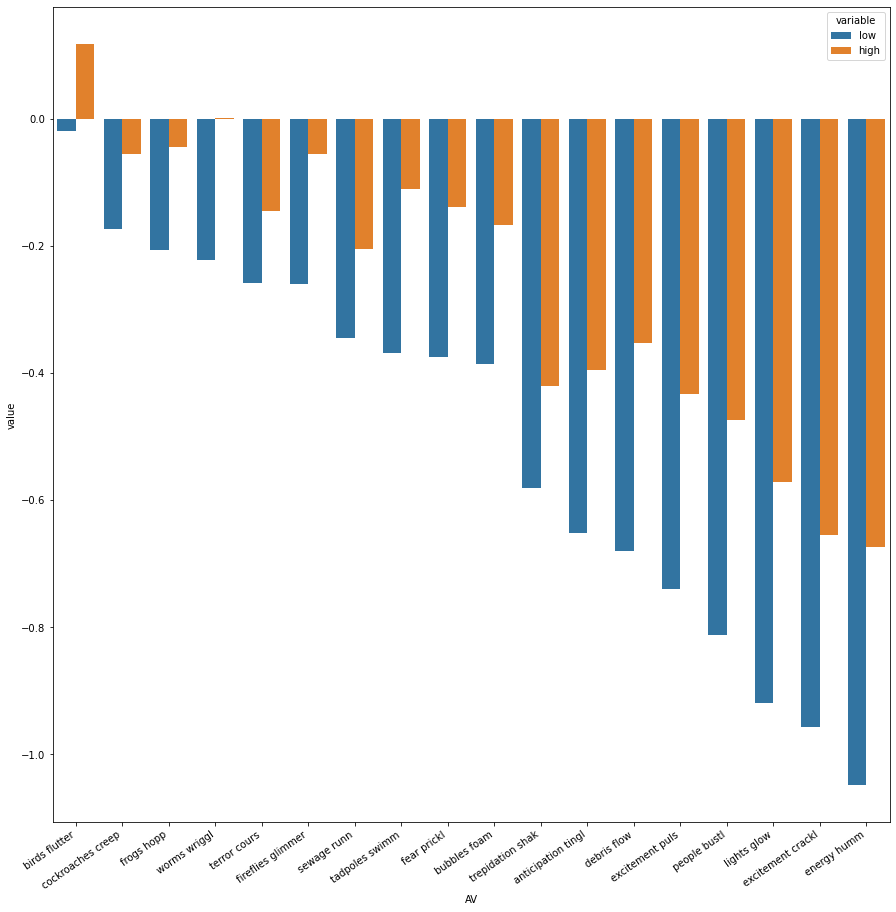

In [187]:
plt.subplots(figsize=(15, 15))
sns.barplot(
    data=item_bootstrap_df.reset_index().melt(id_vars=["item_id", "AV", "L"], value_vars=["low", "high"]),
    x="AV", y="value", hue="variable")
plt.xticks(rotation=35, ha="right")

### Copouts

In [188]:
copouts = exp_items.groupby(["materials_id", "item_id"]).apply(lambda subj_rows: subj_rows.slider_copout.astype(bool).mean())

In [189]:
copouts = merged_df.groupby(["materials_id", "item_id", "agent_is_given", "agent_is_subject"] + keep_cols).apply(lambda rows: rows.slider_copout.astype(bool).agg(["sum", "count"]))
copouts = copouts.sum(level=["item_id", "agent_is_given", "agent_is_subject"])
copouts["mean"] = copouts["sum"].div(copouts["count"])
copouts.sort_values("mean", ascending=False)

slider_copout                            sum  count      mean
item_id agent_is_given agent_is_subject                      
8.0     False          False               1      5  0.200000
30.0    False          True                1      7  0.142857
22.0    False          True                1      8  0.125000
25.0    True           False               1      9  0.111111
20.0    True           True                1      9  0.111111
...                                      ...    ...       ...
                       False               0     10  0.000000
22.0    False          False               0      7  0.000000
        True           False               0      4  0.000000
                       True                0     10  0.000000
64.0    True           True                0      7  0.000000

[72 rows x 3 columns]

<AxesSubplot:xlabel='A', ylabel='slider_copout'>

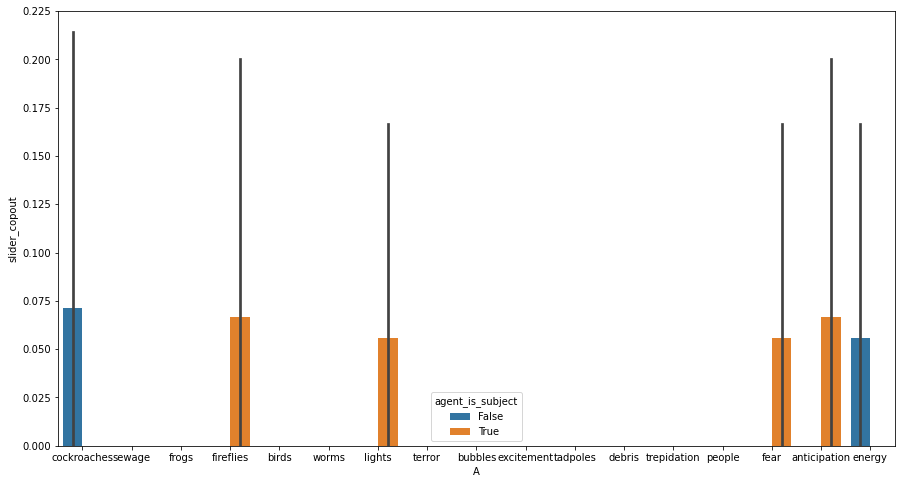

In [190]:
plt.subplots(figsize=(15, 8))
sns.barplot(data=merged_df, x="A", y="slider_copout", hue="agent_is_subject")

<AxesSubplot:xlabel='A concrete?', ylabel='slider_copout'>

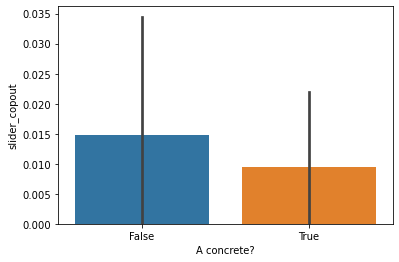

In [191]:
sns.barplot(data=merged_df, x="A concrete?", y="slider_copout")

<AxesSubplot:xlabel='A countable?', ylabel='slider_copout'>

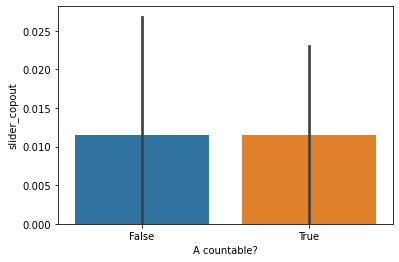

In [192]:
sns.barplot(data=merged_df, x="A countable?", y="slider_copout")

## Item exposure

In [193]:
merged_df.groupby(["item_id", "A", "agent_is_given", "agent_is_subject"]).size().sort_values().head(20)

item_id  A             agent_is_given  agent_is_subject
17.0     debris        False           False               1
58.0     anticipation  True            True                2
18.0     birds         True            False               3
58.0     anticipation  True            False               4
20.0     fireflies     False           False               4
30.0     fear          True            False               4
31.0     excitement    True            False               4
22.0     lights        True            False               4
4.0      people        True            False               4
24.0     frogs         False           False               5
25.0     energy        True            True                5
4.0      people        True            True                5
6.0      terror        True            False               5
64.0     worms         True            False               5
18.0     birds         False           False               5
41.0     trepidation   False 

## Basic visualization: givenness manipulation

In [194]:
# Compute by-item slider difference of means between conditions
def compute_item_difference(item_rows):
    item_rows = item_rows.set_index("agent_is_subject")
    
    if True not in item_rows.index or False not in item_rows.index:
        return np.nan
    
    agent_rows, location_rows = item_rows.loc[True], item_rows.loc[False]
    return location_rows.slider_value_normed.mean() - agent_rows.slider_value_normed.mean()

item_differences = merged_df.groupby(["item_id", "A", "V", "L", "AV", "A concrete?", "A countable?", "agent_is_given"]) \
    .apply(compute_item_difference) \
    .rename("LocationSubject - AgentSubject")

In [195]:
item_differences.sort_values()

item_id  A             V        L           AV                  A concrete?  A countable?  agent_is_given
17.0     debris        flow     river       debris flow         True         False         False            -1.555730
7.0      excitement    crackl   theater     excitement crackl   False        False         False            -0.523934
41.0     trepidation   shak     chest       trepidation shak    False        False         False            -0.394606
58.0     anticipation  tingl    arms        anticipation tingl  False        False         True             -0.382398
25.0     energy        humm     market      energy humm         False        False         False            -0.308889
31.0     excitement    puls     temples     excitement puls     False        False         False            -0.212136
22.0     lights        glow     sky         lights glow         True         True          False            -0.058000
4.0      people        bustl    square      people bustl        True

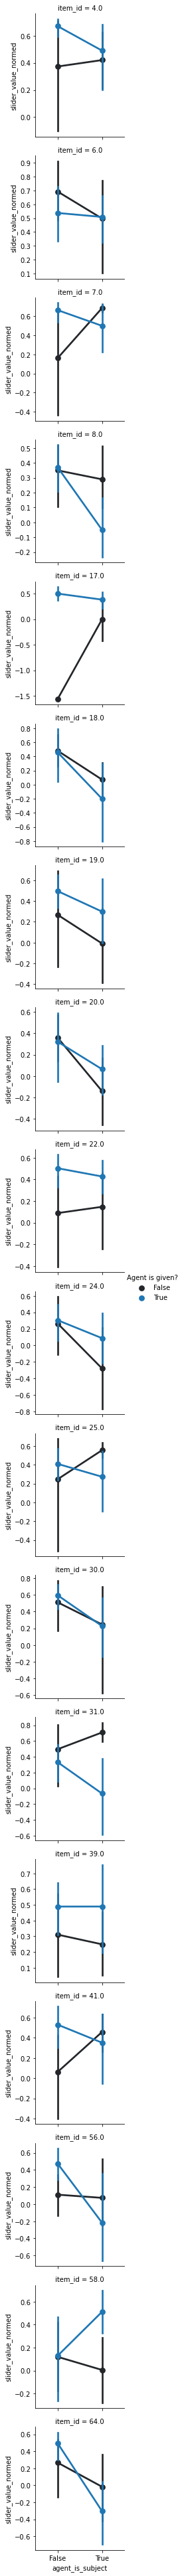

In [196]:
g = sns.FacetGrid(data=merged_df.reset_index(), row="item_id", sharey=False)
g.map(sns.pointplot, "agent_is_subject", "slider_value_normed", "agent_is_given", order=[False, True], hue_order=[False, True])
g.add_legend(title="Agent is given?")
# sns.pointplot(data=merged_df.reset_index(), x="agent_is_subject", y="slider_value_normed", hue="agent_is_given")

## Extras

In [197]:
pd.merge(response_df.xs("A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX", level="uniqueid").reset_index()[["trial_index", "materials_id", "item_id", "condition_0", "condition_1", "agent_is_subject", "slider_value"]],
         materials_df[["A", "V", "L"]],
         left_on=["materials_id", "item_id"], right_index=True).sort_values("agent_is_subject")

KeyError: 'A1VX5ZKAT3S8YP:34PGFRQONPZ0JASKSXG0V1FX6U6JWX'

In [ ]:
exp_items[(exp_items.condition_0 != "filler") & (exp_items.item_id == 3)][["agent_is_subject", "slider_value_normed"]].sort_values(["agent_is_subject", "slider_value_normed"])